In [1]:
%matplotlib inline
from sklearn.cross_validation import train_test_split
from keras.utils.np_utils import to_categorical
import pandas as pd
import numpy as np

Using Theano backend.


In [2]:
# prepare dataset
train = pd.read_csv( "kaggle/train.csv", header=0 )
print( train.shape )

(3751, 1777)


In [3]:
Y = train.Activity
X = train.ix[:,1:]
train_X, test_X, train_Y, test_Y = train_test_split( X, Y, test_size=0.3, random_state=123 )
train_X, test_X = np.asanyarray( train_X ), np.asanyarray( test_X )
train_Y, test_Y = np.asanyarray( train_Y ), np.asanyarray( test_Y )

print( train_X.shape )
print( train_Y.shape, set( train_Y ) )
train_Y

(2625, 1776)
(2625,) {0, 1}


array([1, 1, 1, ..., 1, 1, 0])

In [22]:
# 空のモデルオブジェクトを生成
from keras.models import Sequential
model = Sequential()

In [23]:
# レイヤーは.addで追加して構成する
# 活性化関数や、隠れ層の設定で結果がだいぶ変わる
# 活性化関数 relu, softmax, sigmoid, tanh
from keras.layers import Dense, Activation
# 一層目の追加と活性化関数の定義
model.add( Dense( output_dim=100, input_dim=1776 ) )
model.add( Activation( "relu" ) )
model.add( Dense( output_dim=2 ) )
model.add( Activation( "softmax" ) )

In [24]:
# モデルの生成はcompileで行う。
# 確率的勾配降下法をしていしている adadelta, adam, 他いろいろ指定できる。
model.compile( optimizer="sgd",
               loss="categorical_crossentropy",
               metrics = ["accuracy"] )

In [25]:
# バッチサイズと学習のサイクルを指定します。
hist = model.fit( train_X, to_categorical(train_Y), nb_epoch=20, batch_size=100 )

Epoch 1/20
2625/2625 [==============================] - 0s - loss: 0.6988 - acc: 0.5227     
Epoch 2/20
2625/2625 [==============================] - 0s - loss: 0.6601 - acc: 0.6267     
Epoch 3/20
2625/2625 [==============================] - 0s - loss: 0.6334 - acc: 0.6678     
Epoch 4/20
2625/2625 [==============================] - 0s - loss: 0.6138 - acc: 0.6945     
Epoch 5/20
2625/2625 [==============================] - 0s - loss: 0.5973 - acc: 0.7082     
Epoch 6/20
2625/2625 [==============================] - 0s - loss: 0.5833 - acc: 0.7162     
Epoch 7/20
2625/2625 [==============================] - 0s - loss: 0.5710 - acc: 0.7261     
Epoch 8/20
2625/2625 [==============================] - 0s - loss: 0.5601 - acc: 0.7330     
Epoch 9/20
2625/2625 [==============================] - 0s - loss: 0.5505 - acc: 0.7406     
Epoch 10/20
2625/2625 [==============================] - 0s - loss: 0.5417 - acc: 0.7448     
Epoch 11/20
2625/2625 [==============================] - 0s - loss: 0

In [26]:
#　学習させたモデルで予測してみる
pred_Y = model.predict_classes( test_X )

1024/1126 [==========================>...] - ETA: 0s

In [27]:
pred_Y

array([1, 0, 0, ..., 1, 0, 0])

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
confusion_matrix( test_Y, pred_Y )

array([[364, 150],
       [131, 481]])

In [30]:
print( classification_report( test_Y, pred_Y ))

             precision    recall  f1-score   support

          0       0.74      0.71      0.72       514
          1       0.76      0.79      0.77       612

avg / total       0.75      0.75      0.75      1126



In [31]:
loss = hist.history[ "loss" ]
acc = hist.history[ "acc" ]

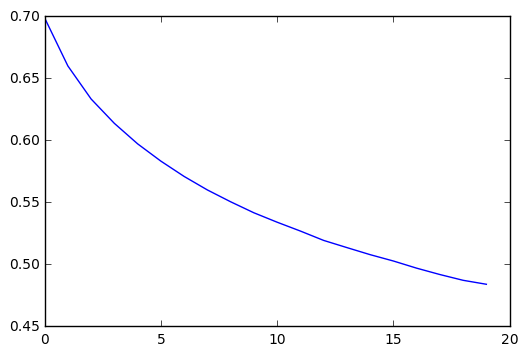

In [32]:
# 学習の過程はヒストリとして保存されているのでかしかしてみる。
import matplotlib.pyplot as plt
plt.plot( range( len( loss ) ), loss, label = "loss" )

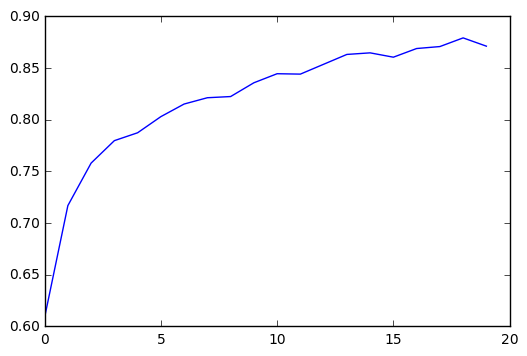

In [15]:
plt.plot( range( len( acc ) ), acc, label = "acc" )

In [34]:
#モデルの詳細もすぐに取れる
model.get_config()

[{'class_name': 'Dense',
  'config': {'W_constraint': None,
   'W_regularizer': None,
   'activation': 'linear',
   'activity_regularizer': None,
   'b_constraint': None,
   'b_regularizer': None,
   'batch_input_shape': (None, 1776),
   'bias': True,
   'init': 'glorot_uniform',
   'input_dim': 1776,
   'input_dtype': 'float32',
   'name': 'dense_3',
   'output_dim': 100,
   'trainable': True}},
 {'class_name': 'Activation',
  'config': {'activation': 'relu', 'name': 'activation_3', 'trainable': True}},
 {'class_name': 'Dense',
  'config': {'W_constraint': None,
   'W_regularizer': None,
   'activation': 'linear',
   'activity_regularizer': None,
   'b_constraint': None,
   'b_regularizer': None,
   'bias': True,
   'init': 'glorot_uniform',
   'input_dim': None,
   'name': 'dense_4',
   'output_dim': 2,
   'trainable': True}},
 {'class_name': 'Activation',
  'config': {'activation': 'softmax',
   'name': 'activation_4',
   'trainable': True}}]

In [35]:
# SVCはどうでしょう？
from sklearn.svm import SVC
svc = SVC()

In [17]:
svc.fit( train_X, train_Y )

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
svc_pred_Y = svc.predict( test_X )

In [19]:
confusion_matrix( test_Y, svc_pred_Y )

array([[345, 169],
       [151, 461]])

In [20]:
# DNNがちょっとよい
print( classification_report( test_Y, svc_pred_Y ) )

             precision    recall  f1-score   support

          0       0.70      0.67      0.68       514
          1       0.73      0.75      0.74       612

avg / total       0.72      0.72      0.72      1126



1.0